In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('Dataset\ExtractedFeatures.csv')

print(df.head())


       mean   std_dev    energy   entropy  num_peaks  lbp_0  lbp_1  ClassLabel
0  0.094581  0.058153  0.049309  1.097330        0.0      2      3           1
1  0.096067  0.076631  0.060405      -inf        0.0      2      3           1
2  0.093970  0.051851  0.046076  1.178120        1.0      0      3           1
3  0.039831  0.020652  0.008052  1.217346        1.0      0      3           1
4 -0.001684  0.078266  0.024514      -inf        0.0      3      1           1


In [3]:
correlation_matrix = df.corr()
print(correlation_matrix)

                mean   std_dev    energy   entropy  num_peaks     lbp_0  \
mean        1.000000 -0.999223 -0.999587 -0.576670   0.011994 -0.004990   
std_dev    -0.999223  1.000000  0.999614 -0.575394  -0.010309  0.005459   
energy     -0.999587  0.999614  1.000000 -0.402858  -0.011795  0.005953   
entropy    -0.576670 -0.575394 -0.402858  1.000000  -0.166186  0.061200   
num_peaks   0.011994 -0.010309 -0.011795 -0.166186   1.000000 -0.885604   
lbp_0      -0.004990  0.005459  0.005953  0.061200  -0.885604  1.000000   
lbp_1      -0.015341  0.013456  0.013192  0.182364   0.745249 -0.765212   
ClassLabel  0.020357 -0.021481 -0.020039  0.116534  -0.014825 -0.002764   

               lbp_1  ClassLabel  
mean       -0.015341    0.020357  
std_dev     0.013456   -0.021481  
energy      0.013192   -0.020039  
entropy     0.182364    0.116534  
num_peaks   0.745249   -0.014825  
lbp_0      -0.765212   -0.002764  
lbp_1       1.000000    0.012616  
ClassLabel  0.012616    1.000000  


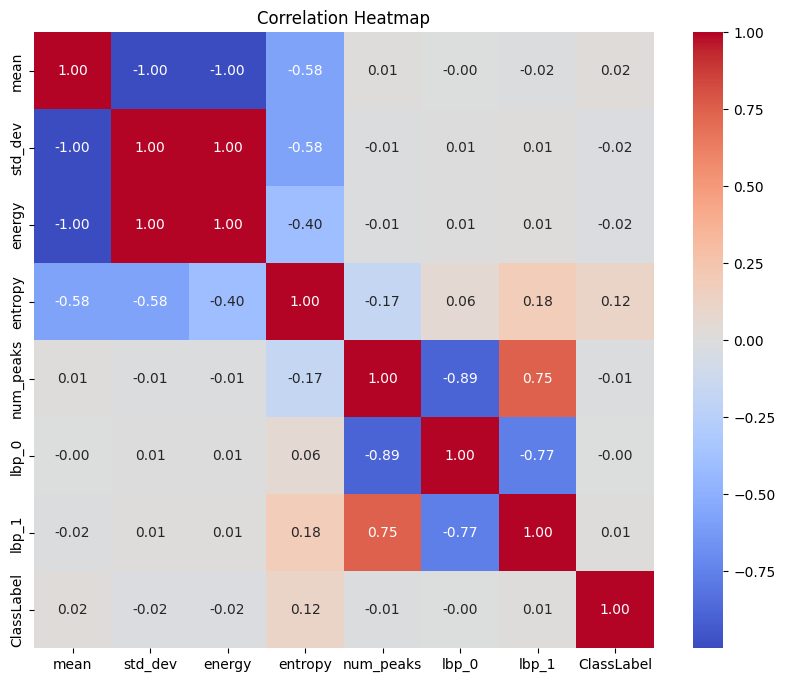

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


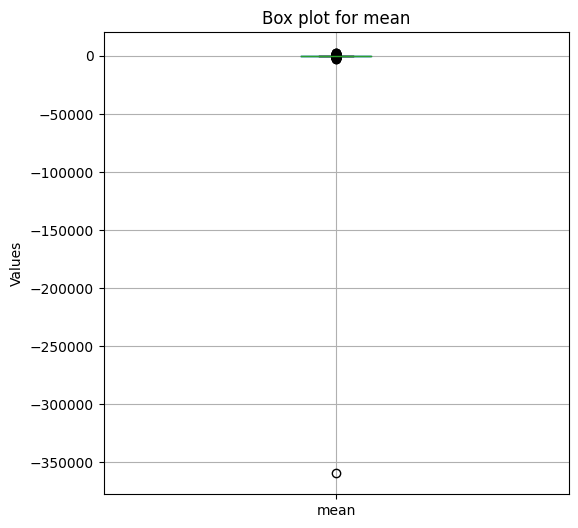

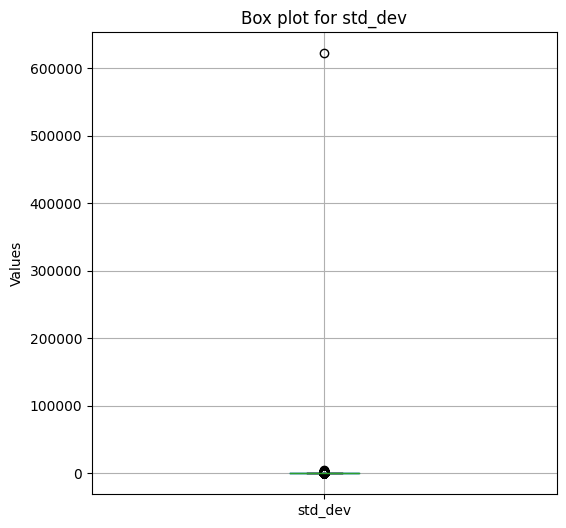

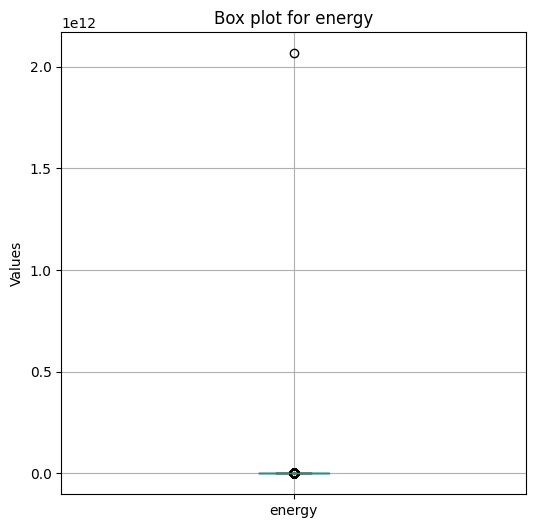

c:\Python311\Lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
c:\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1267: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
c:\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1274: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
c:\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1282: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
c:\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1283: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


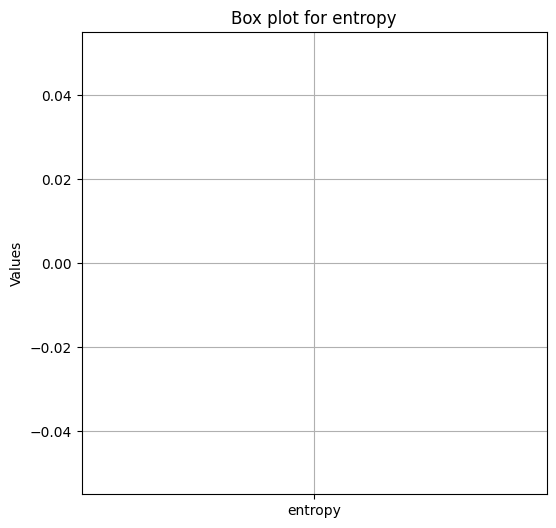

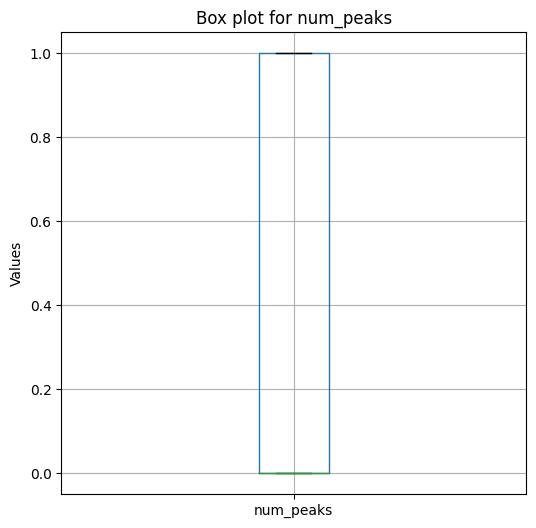

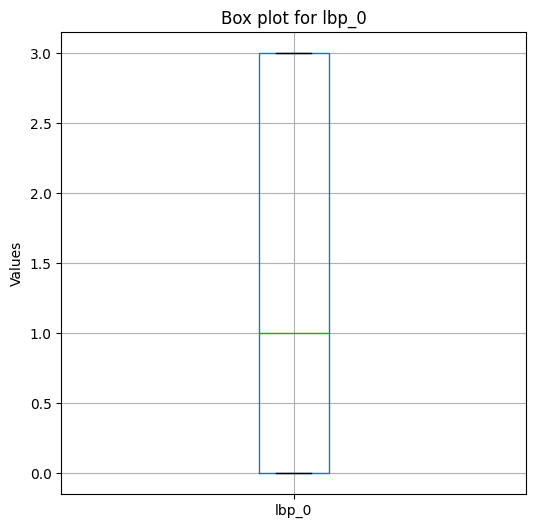

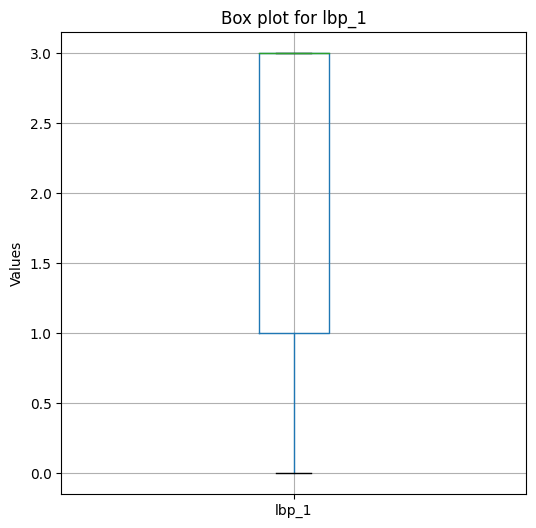

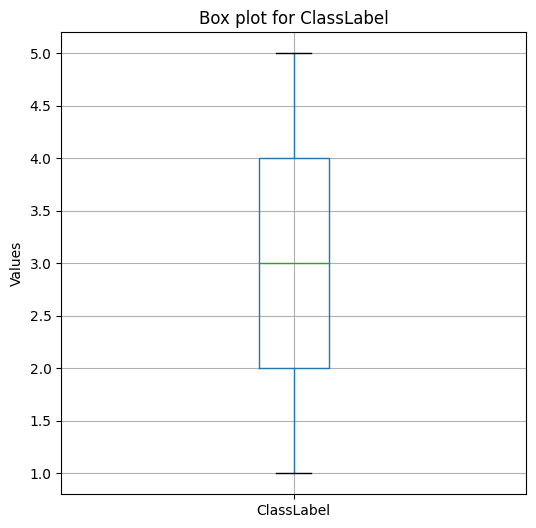

In [5]:
import matplotlib.pyplot as plt

# Iterate over each column in the DataFrame
for column in df.columns:
    plt.figure(figsize=(6, 6))
    # Create a box plot for the current column
    df.boxplot(column=column)
    plt.title('Box plot for ' + column)
    plt.ylabel('Values')
    plt.show()


In [12]:
# Replace inf and -inf with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
df.dropna(inplace=True)

# Save the intermediate DataFrame to a new CSV file
df.to_csv('Dataset/NoInfValues.csv', index=False)

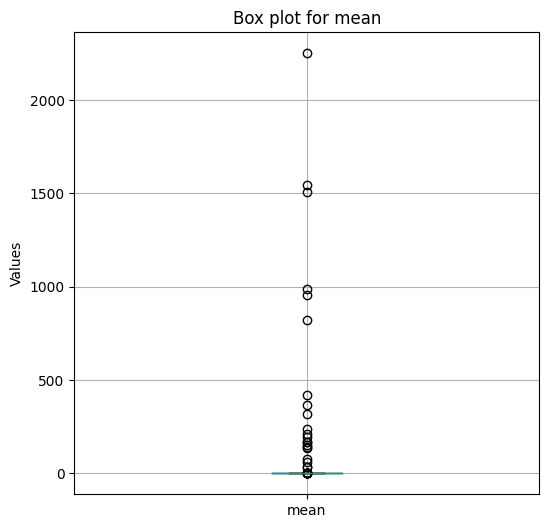

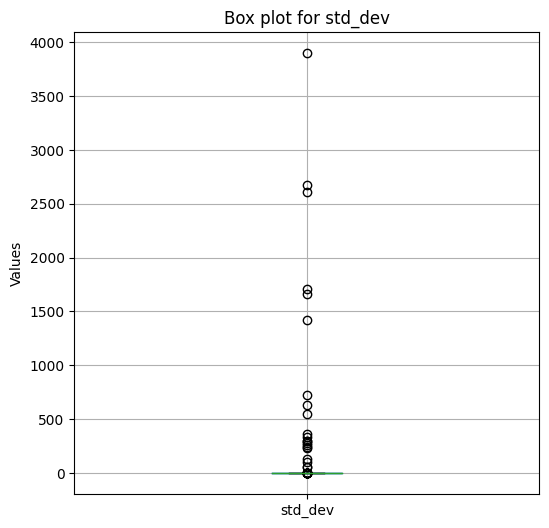

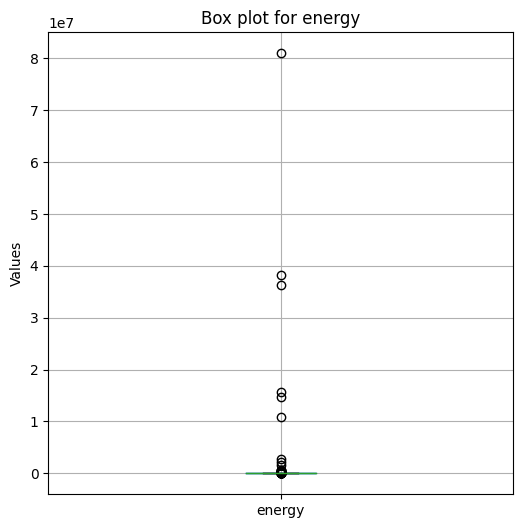

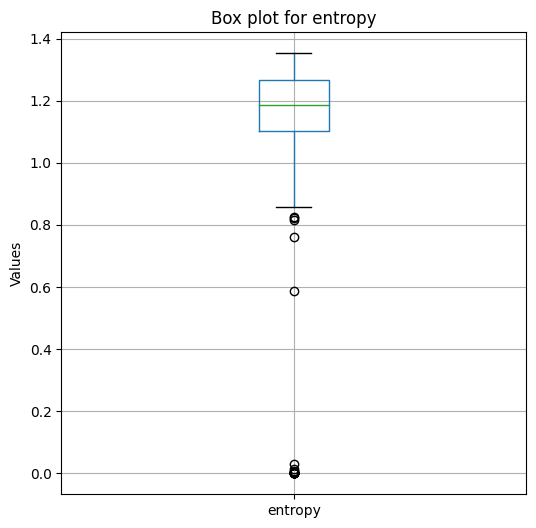

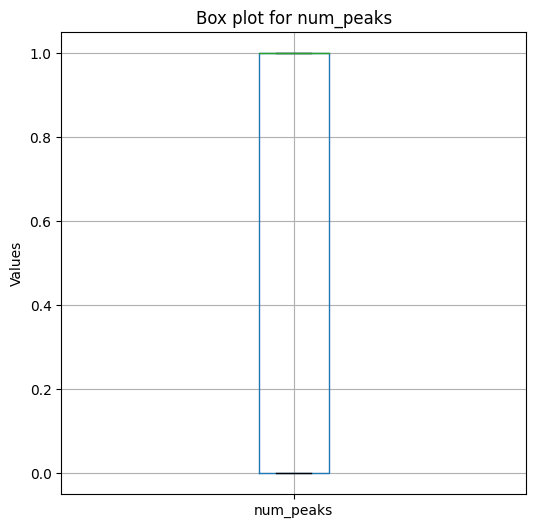

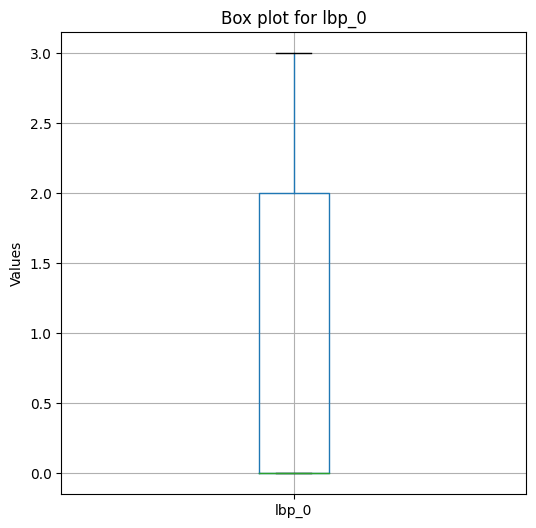

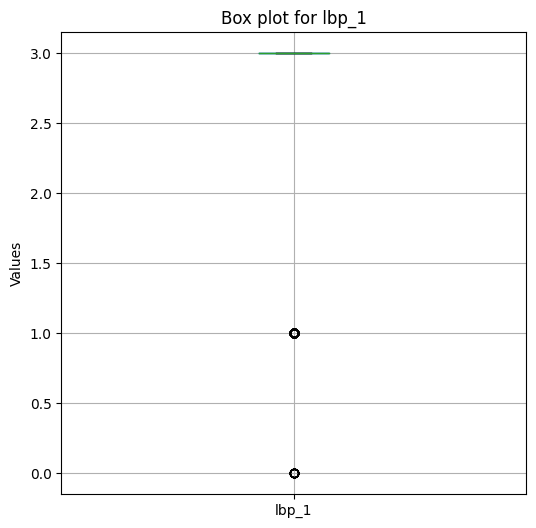

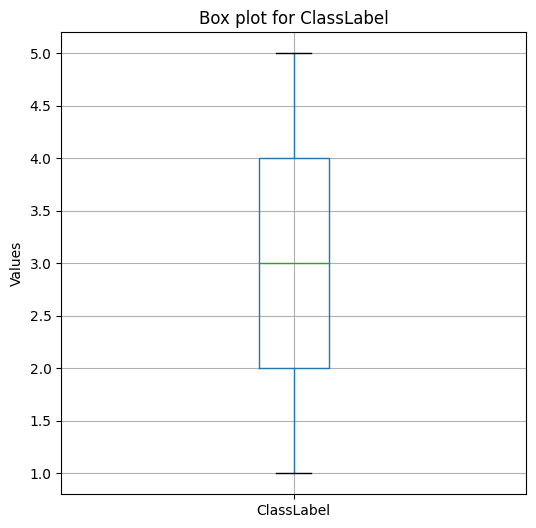

In [8]:
import matplotlib.pyplot as plt

# Iterate over each column in the DataFrame
for column in df.columns:
    plt.figure(figsize=(6, 6))
    # Create a box plot for the current column
    df.boxplot(column=column)
    plt.title('Box plot for ' + column)
    plt.ylabel('Values')
    plt.show()


In [9]:
# Calculate the Z-scores of each column in the DataFrame
z_scores = np.abs((df - df.mean()) / df.std())

# Define the threshold for an outlier
threshold = 3

# Identify rows that have any column with a Z-score above the threshold
outliers = (z_scores > threshold).any(axis=1)

# Filter out the outlier rows
df_cleaned = df[~outliers]

# Optionally, reset the index of the cleaned DataFrame
df_cleaned.reset_index(drop=True, inplace=True)

# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('Dataset/CleanedExtractedFeatures.csv', index=False)

# Print the cleaned DataFrame
print(df_cleaned)

         mean   std_dev    energy   entropy  num_peaks  lbp_0  lbp_1  \
0    0.094581  0.058153  0.049309  1.097330        0.0      2      3   
1    0.093970  0.051851  0.046076  1.178120        1.0      0      3   
2    0.039831  0.020652  0.008052  1.217346        1.0      0      3   
3    0.077550  0.050505  0.034259  1.115788        1.0      0      3   
4    0.093627  0.051805  0.045799  1.178472        1.0      0      3   
..        ...       ...       ...       ...        ...    ...    ...   
573  0.159596  0.142486  0.183093  0.897212        1.0      0      3   
574  0.193864  0.145346  0.234836  1.056115        1.0      0      3   
575  0.207685  0.189311  0.315887  0.862954        1.0      0      3   
576  0.251960  0.100256  0.294140  1.304683        0.0      2      3   
577  0.201326  0.113950  0.214068  1.206893        0.0      2      3   

     ClassLabel  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
573      

                mean   std_dev    energy   entropy  num_peaks     lbp_0  \
mean        1.000000  0.999978  0.999936 -0.208465   0.032107  0.005310   
std_dev     0.999978  1.000000  0.999985 -0.210599   0.032840  0.004750   
energy      0.999936  0.999985  1.000000 -0.209245   0.032635  0.004960   
entropy    -0.208465 -0.210599 -0.209245  1.000000  -0.261897  0.225535   
num_peaks   0.032107  0.032840  0.032635 -0.261897   1.000000 -0.929522   
lbp_0       0.005310  0.004750  0.004960  0.225535  -0.929522  1.000000   
lbp_1      -0.130578 -0.130003 -0.130144 -0.140129   0.649419 -0.698170   
ClassLabel -0.032373 -0.034306 -0.035942  0.089767  -0.068785  0.040150   

               lbp_1  ClassLabel  
mean       -0.130578   -0.032373  
std_dev    -0.130003   -0.034306  
energy     -0.130144   -0.035942  
entropy    -0.140129    0.089767  
num_peaks   0.649419   -0.068785  
lbp_0      -0.698170    0.040150  
lbp_1       1.000000    0.023368  
ClassLabel  0.023368    1.000000  


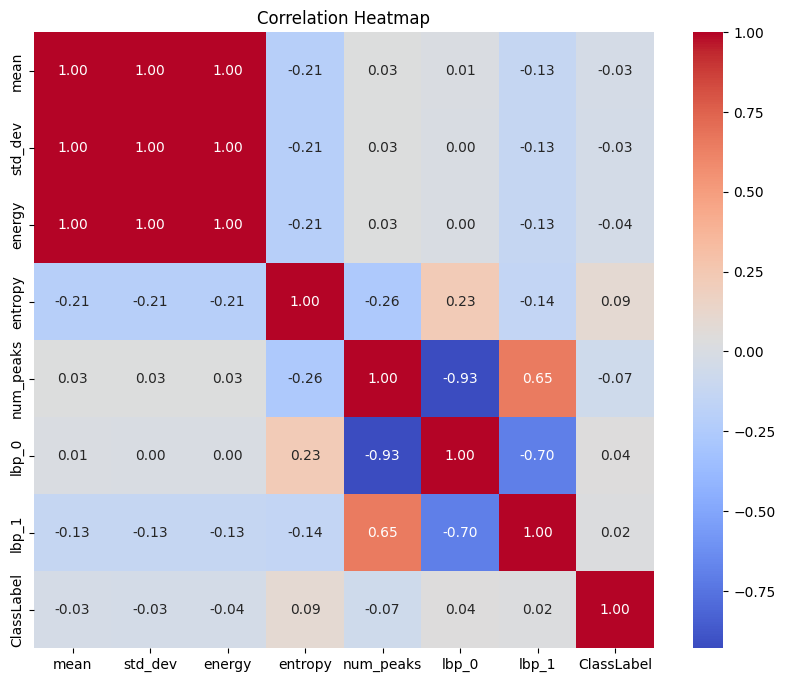

In [10]:
df = pd.read_csv('Dataset\CleanedExtractedFeatures.csv')
correlation_matrix = df.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


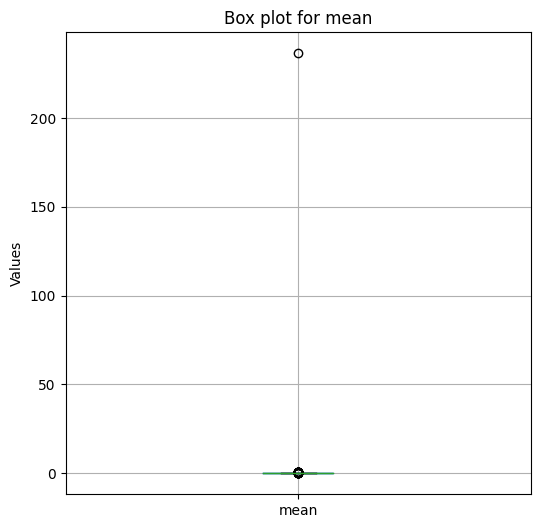

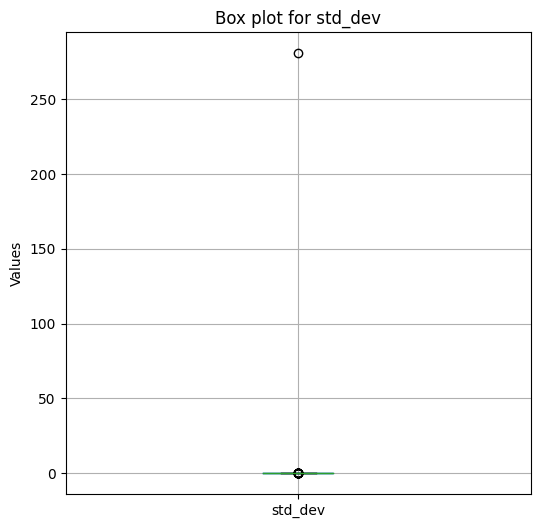

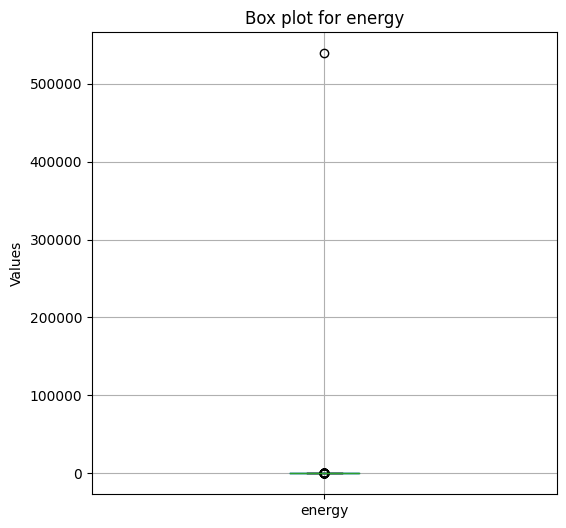

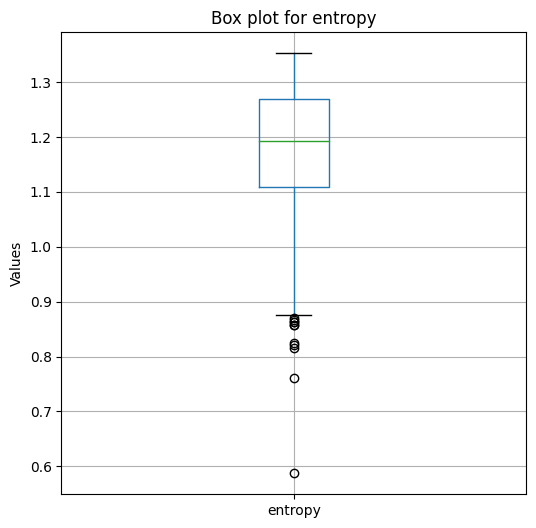

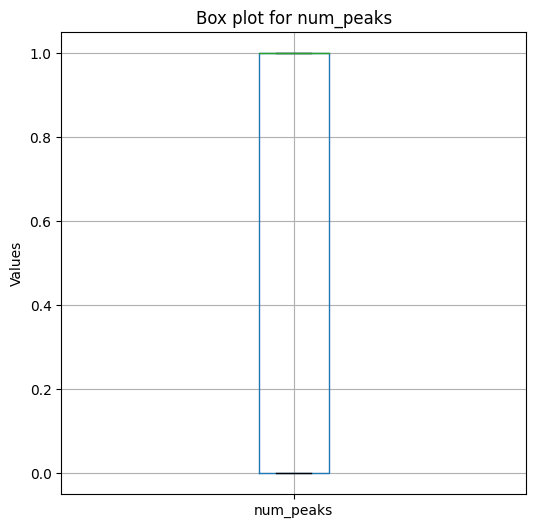

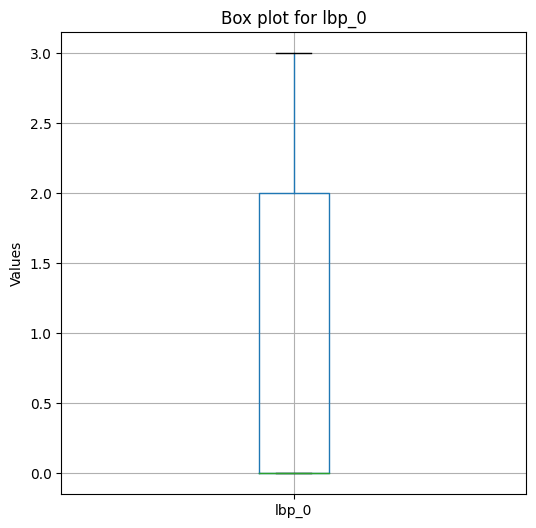

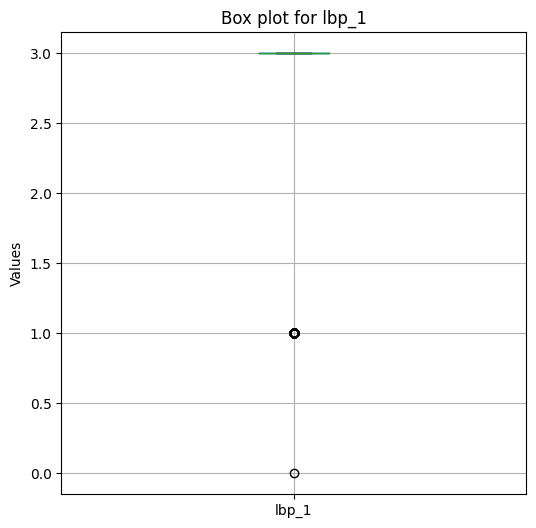

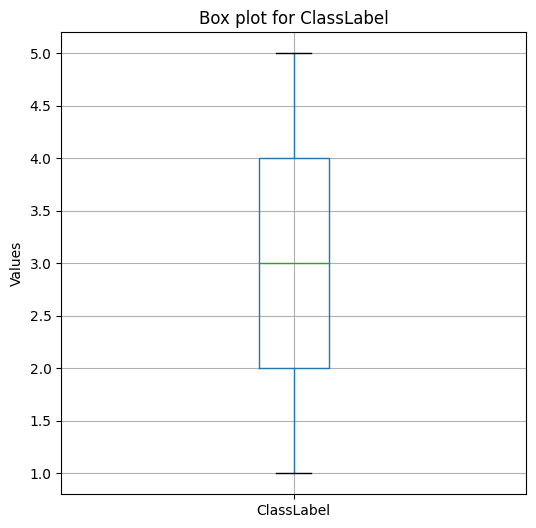

In [11]:

# Iterate over each column in the DataFrame
for column in df.columns:
    plt.figure(figsize=(6, 6))
    # Create a box plot for the current column
    df.boxplot(column=column)
    plt.title('Box plot for ' + column)
    plt.ylabel('Values')
    plt.show()